In [1]:
import os
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta

import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

os.chdir('/Users/Evan/DataScience/TB_Nation/Datasets/')
files = os.listdir()

In [37]:
datasets = pd.read_excel('~/DataScience/TB_Nation/TB_nation.xlsx',index_col='Date')

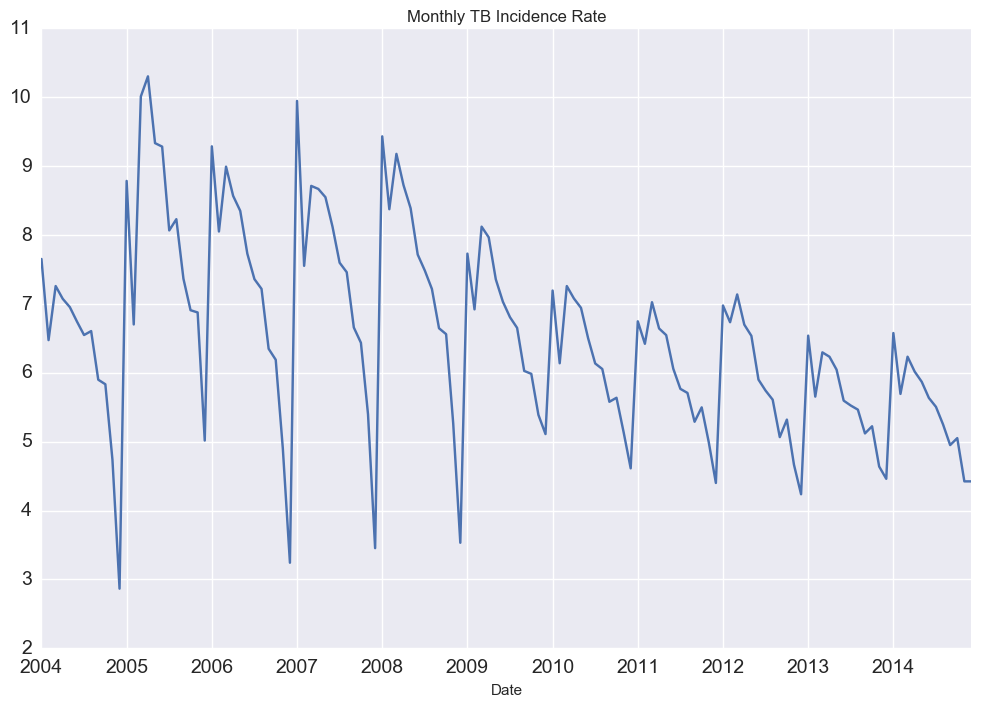

In [38]:
datasets.Incidence_rate.plot(figsize=(12,8), title= 'Monthly TB Incidence Rate', fontsize=14)
# plt.savefig('month_TB.png', bbox_inches='tight')

In [39]:
datasets_pred = datasets[datasets.index>='2014-01-1']
datasets = datasets[datasets.index<'2014-01-01']
datasets.shape

(120, 7)

In [40]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=12,center=False).mean()
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

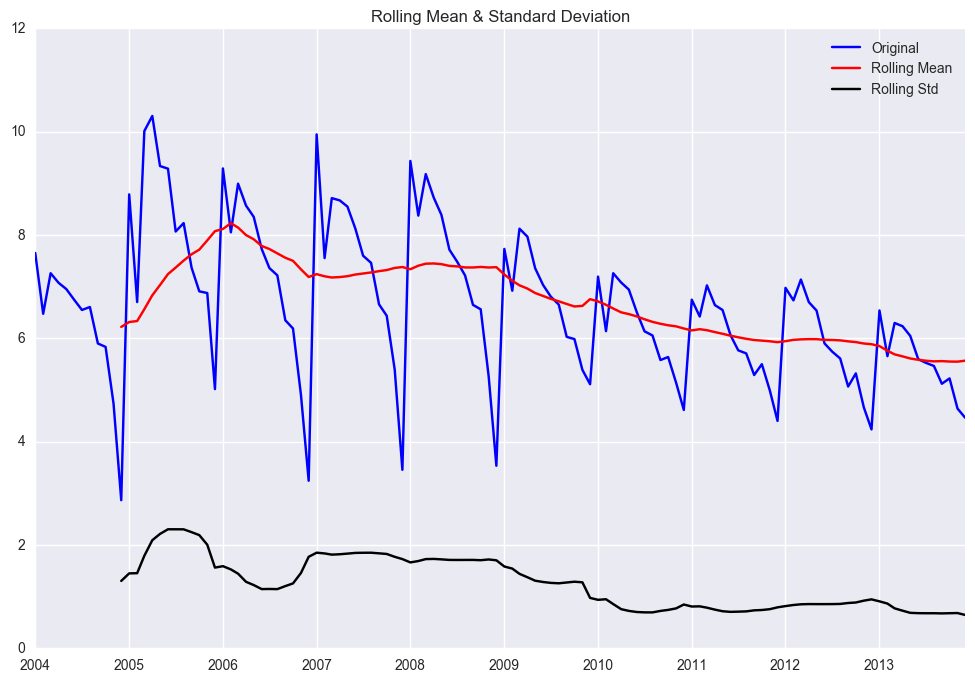

Results of Dickey-Fuller Test:
Test Statistic                  -0.851396
p-value                          0.803557
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (10%)            -2.581393
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
dtype: float64


/Users/Evan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


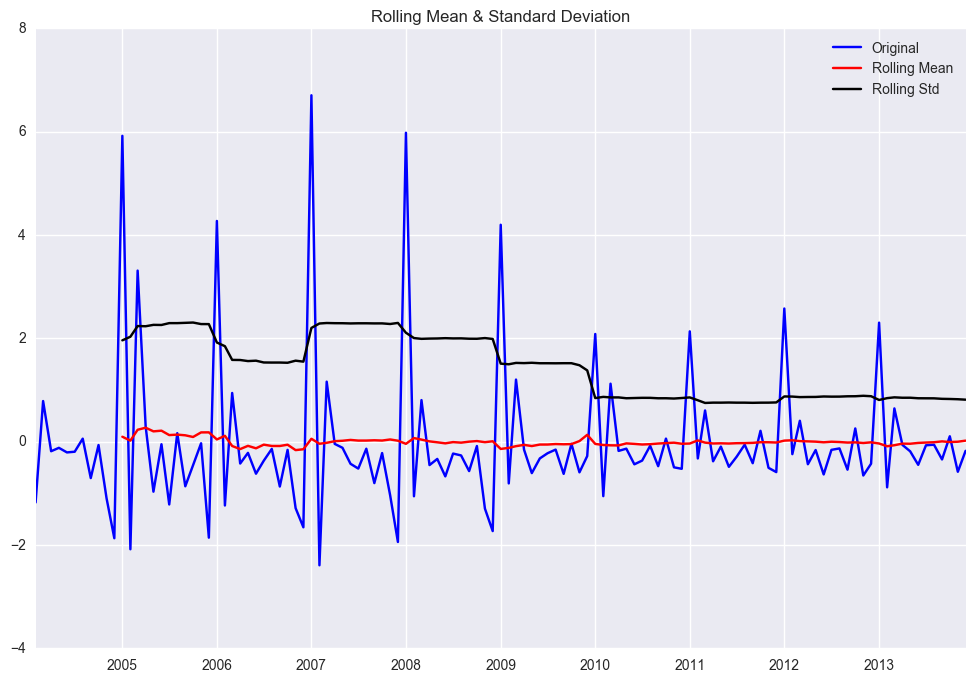

Results of Dickey-Fuller Test:
Test Statistic                  -3.789533
p-value                          0.003016
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (10%)            -2.581393
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
dtype: float64


/Users/Evan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


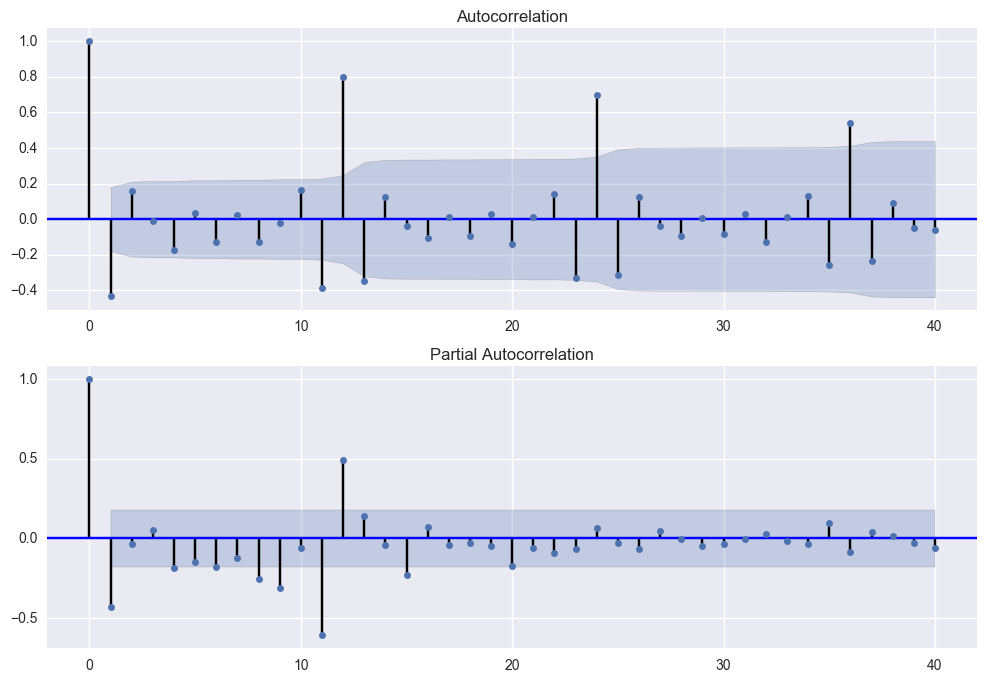

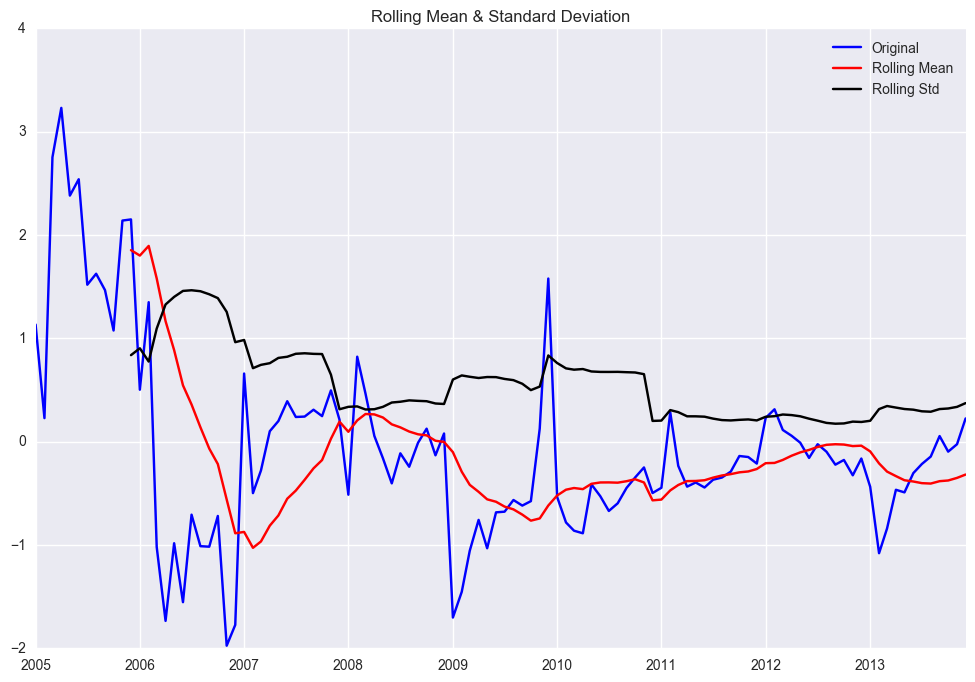

Results of Dickey-Fuller Test:
Test Statistic                  -4.078157
p-value                          0.001052
#Lags Used                       0.000000
Number of Observations Used    107.000000
Critical Value (10%)            -2.581393
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
dtype: float64
                                 Statespace Model Results                                 
Dep. Variable:                     Incidence_rate   No. Observations:                  120
Model:             SARIMAX(4, 1, 0)x(4, 1, 0, 12)   Log Likelihood                 -88.833
Date:                            Fri, 30 Sep 2016   AIC                            195.667
Time:                                    00:11:04   BIC                            220.754
Sample:                                01-01-2004   HQIC                           205.855
                                     - 12-01-2013                                         
Covariance Type:       

/Users/Evan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


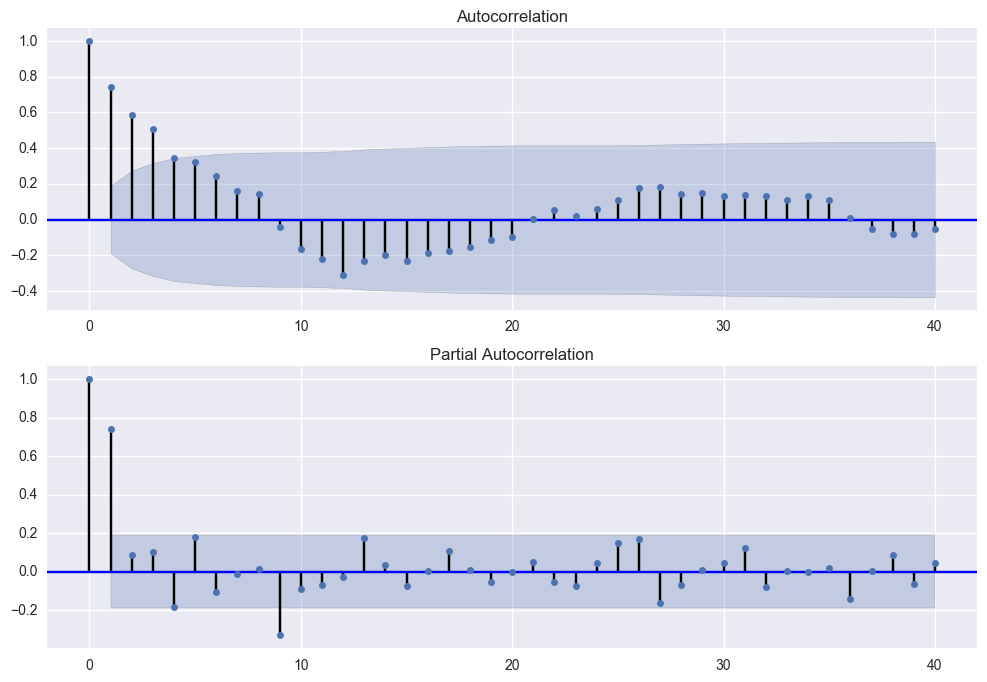

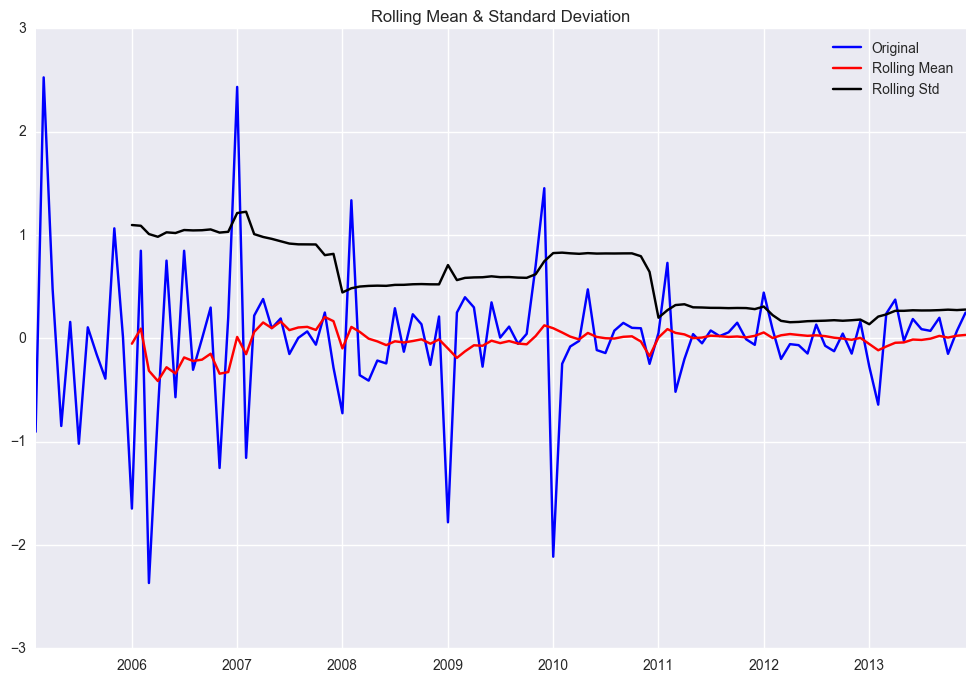

Results of Dickey-Fuller Test:
Test Statistic                -1.055529e+01
p-value                        7.981430e-19
#Lags Used                     1.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (10%)          -2.581676e+00
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
dtype: float64
                                 Statespace Model Results                                 
Dep. Variable:                     Incidence_rate   No. Observations:                  120
Model:             SARIMAX(0, 1, 2)x(0, 1, 1, 12)   Log Likelihood                 -92.813
Date:                            Fri, 30 Sep 2016   AIC                            193.626
Time:                                    00:11:05   BIC                            204.776
Sample:                                01-01-2004   HQIC                           198.154
                                     - 12-01-2013                                         
Covarianc

/Users/Evan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


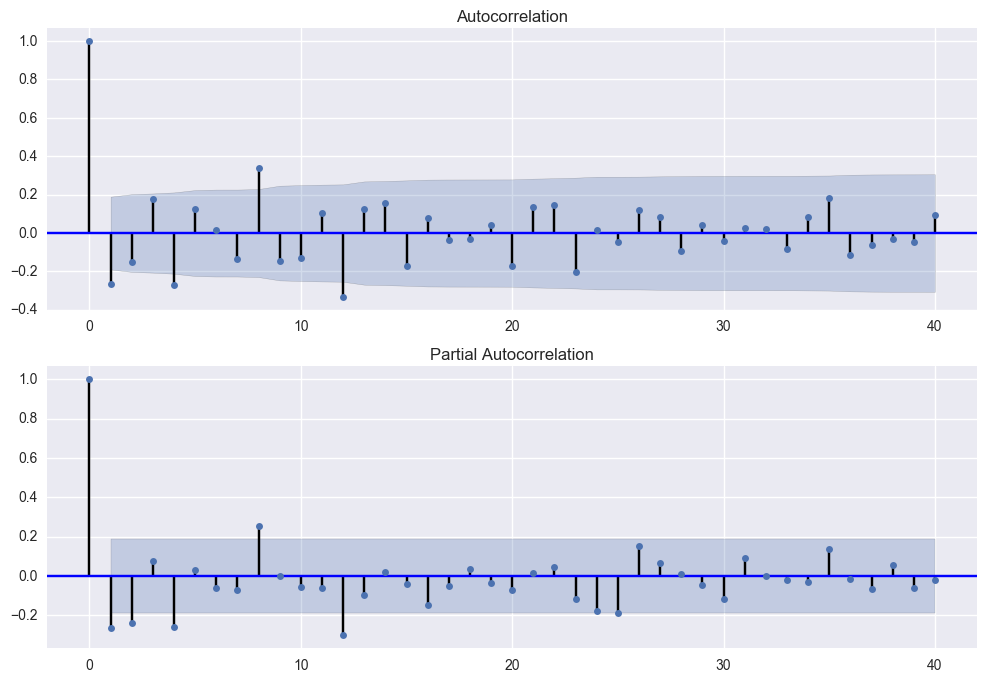

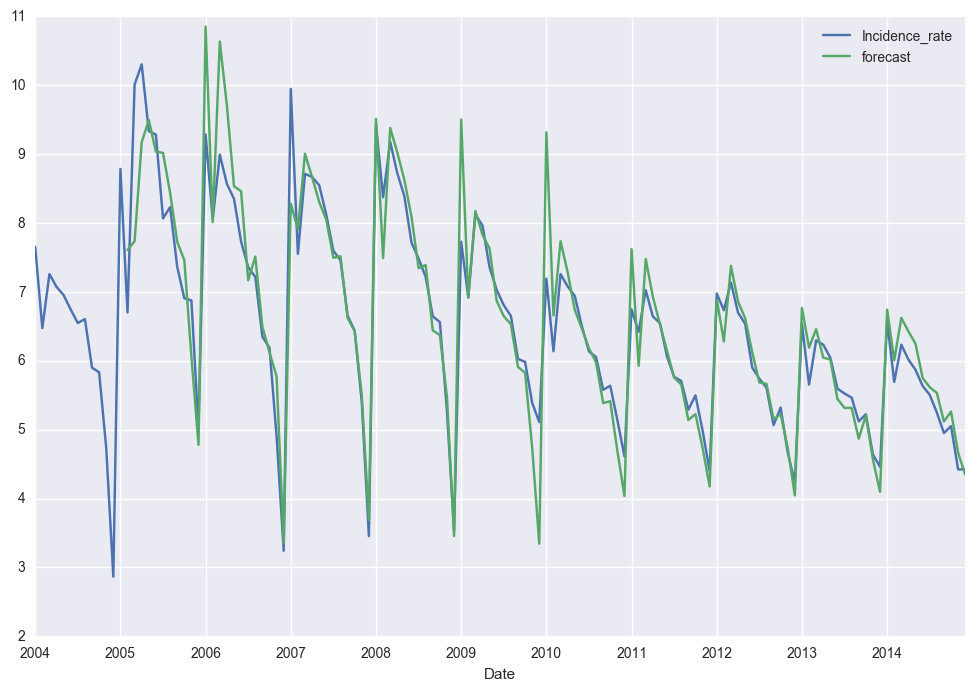

In [6]:
test_stationarity(datasets.Incidence_rate)
datasets['first_diff'] = datasets.Incidence_rate - datasets.Incidence_rate.shift(1)
test_stationarity(datasets.first_diff.dropna(inplace=False))
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datasets.first_diff.iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datasets.first_diff.iloc[1:], lags=40, ax=ax2)
datasets['seasonal_difference'] = datasets.Incidence_rate - datasets.Incidence_rate.shift(12)  
test_stationarity(datasets.seasonal_difference.dropna(inplace=False))
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datasets.seasonal_difference.iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datasets.seasonal_difference.iloc[13:], lags=40, ax=ax2)
mod = sm.tsa.SARIMAX(datasets.Incidence_rate, trend='n', order=(4,1,0), seasonal_order=(4,1,0,12))
results = mod.fit()
print(results.summary())
datasets['seasonal_first_difference'] = datasets.first_diff-datasets.first_diff.shift(12)
test_stationarity(datasets.seasonal_first_difference.dropna(inplace=False))
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datasets.seasonal_first_difference.iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datasets.seasonal_first_difference.iloc[13:], lags=40, ax=ax2)
mod = sm.tsa.SARIMAX(datasets.Incidence_rate, trend='n', order=(0,1,2), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())
datasets['forecast'] = results.predict(start = 13, end= 131, dynamic= False)  
dta = pd.concat([datasets, datasets_pred])
dta['forecast'] = results.predict(start=13,end=131,dynamic=False)
dta['forecast'] = results.predict(start = 13, end= 131, dynamic= False)  
dta[['Incidence_rate','forecast']].plot(figsize=(12, 8))

In [7]:
from sklearn import preprocessing as pp
from neupy.algorithms import GRNN as grnn
from neupy.estimators import mse

In [20]:
data_train = dta.loc['2005-02-1':'2014-12-01'][['Incidence_rate','forecast','Month','Year']]
x_train = data_train.loc[:'2013-12-01',['forecast','Month','Year']]
y_train = data_train.loc[:'2013-12-01','Incidence_rate']
x_test = data_train.loc['2014-01-01':,['forecast','Month','Year']]
y_test = data_train.loc['2014-01-01':,'Incidence_rate']

In [21]:
def try_std(x):
    nn = grnn(std =x ,verbose=False)
    nn.train(x_train,y_train)
    y_pred = nn.predict(x_test)
    return mse(y_pred,y_test)**0.5

In [22]:
min_value = try_std(0.1)
value = 0.1
for x in np.linspace(0.01,0.6,100):
        if min_value > try_std(x):
            min_value = try_std(x)
            value = x
print(value,min_value)

0.129191919192 0.14105079916748245


In [23]:
mod_GRNN = grnn(std = 0.129191919192 ,verbose=False)
mod_GRNN.train(x_train,y_train)
data_train.loc[:,'NN']=mod_GRNN.predict(data_train.loc[:,['forecast','Month','Year']])

In [24]:
data_train

,Incidence_rate,forecast,Month,Year,NN
Date,,,,,
2005-02-01,6.701542,7.607165,2,2005,6.701542
2005-03-01,10.011233,7.736466,3,2005,10.011233
2005-04-01,10.302798,9.171983,4,2005,10.302798
2005-05-01,9.333632,9.495365,5,2005,9.333632
2005-06-01,9.282781,9.035327,6,2005,9.282781
2005-07-01,8.066361,9.018020,7,2005,8.066361
2005-08-01,8.229684,8.439350,8,2005,8.229684
2005-09-01,7.365373,7.727532,9,2005,7.365373
2005-10-01,6.908408,7.459854,10,2005,6.908408


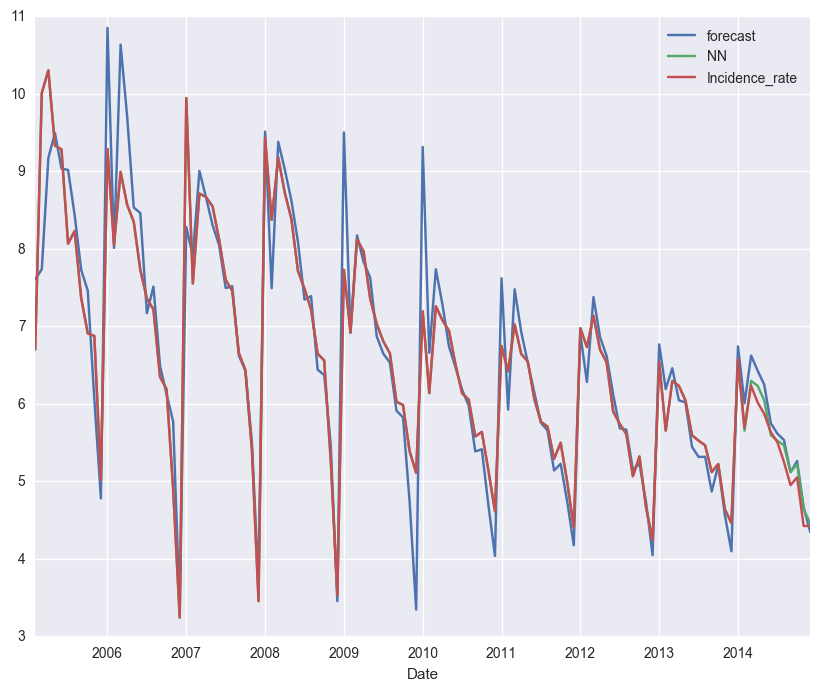

In [25]:
data_train.loc[:,['forecast','NN','Incidence_rate']].plot(figsize=(10, 8))

In [27]:
data_out = data_train[data_train.index>='2014-01-01']
mse(data_out['forecast'],data_out['Incidence_rate'])**0.5 - mse(data_out['NN'],data_out['Incidence_rate'])**0.5

0.12216708164714454

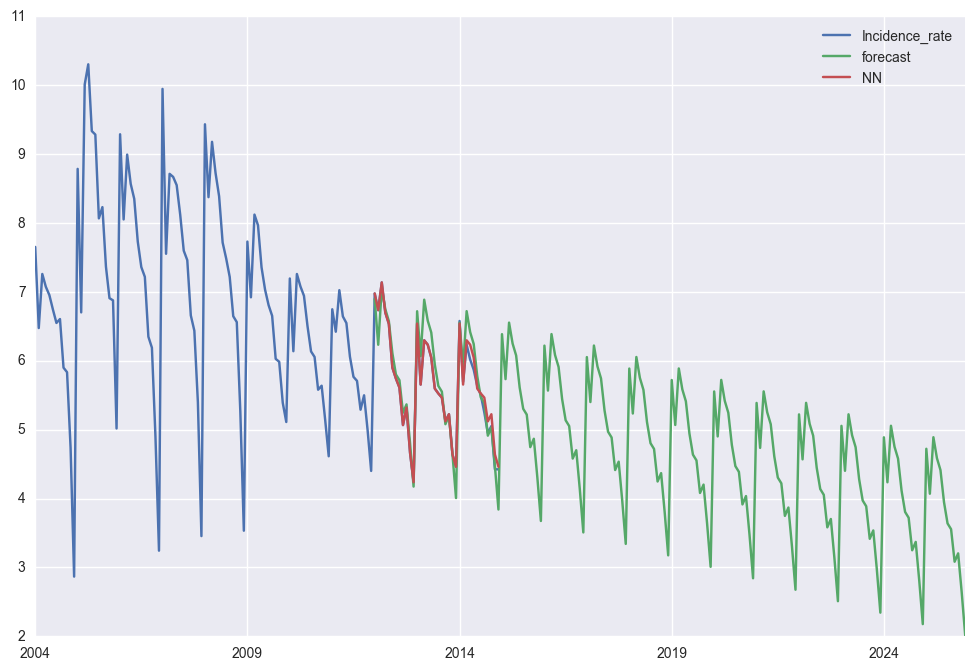

In [30]:
start = datetime.datetime.strptime("2015-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,132)]
future = pd.DataFrame(index=date_list, columns= dta.columns)
TB_future = pd.concat([dta, future])
TB_future['forecast'] = results.predict(start = 96, end = 263, dynamic= True)  
TB_future['NN'] = mod_GRNN.predict(TB_future.loc[:,['forecast','Month','Year']])
TB_future[['Incidence_rate', 'forecast','NN']].plot(figsize=(12, 8)) 

In [31]:
data_out = data_train[data_train.index>='2011-01-01']
mse(data_out['forecast'],data_out['Incidence_rate'])**0.5-mse(data_out['NN'],data_out['Incidence_rate'])**0.5

0.19765005657468515

In [32]:
np.sum(TB_future[TB_future.index>='2025-01-01']['forecast'])

44.75546821338564

In [33]:
np.sum(TB_future[TB_future.index>='2025-01-01']['NN'])

nan